In [73]:
!pip install hvplot

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [75]:
# Загрузка набора данных
df = pd.read_csv("/content/Real Estate Dataset.csv")

# Просмотр основной информации о фрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   number                               414 non-null    int64  
 1   transaction date                     414 non-null    float64
 2   house age                            414 non-null    float64
 3   distance to the nearest MRT station  414 non-null    float64
 4   number of convenience stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [76]:
df.shape

(414, 8)

In [77]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

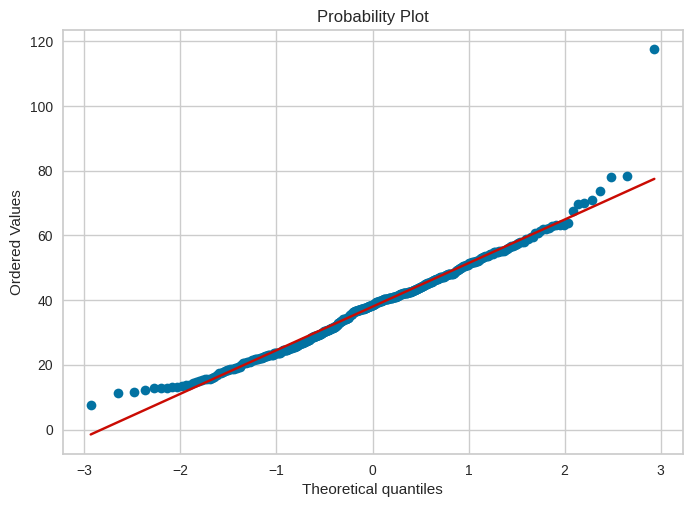

In [78]:
Y_label = 'house price of unit area'

#QQ-Plot
stats.probplot(df[Y_label], dist='norm', plot=py)
py.show()

<Axes: >

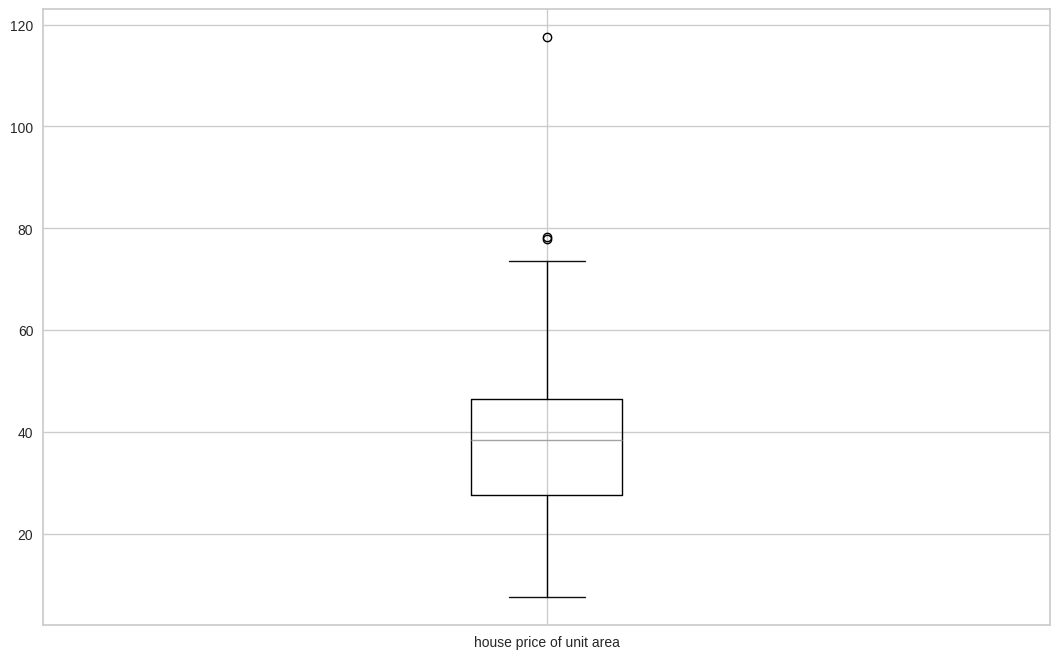

In [79]:
df[[Y_label]].boxplot(figsize=(13, 8))

In [80]:
# Определяем Q1 и Q2
Q1 =df[Y_label].quantile(0.25)
Q3 =df[Y_label].quantile(0.75)
print(Q1)
print(Q3)

27.7
46.6


In [81]:
# Определим IQR
IQR =  Q3 - Q1
IQR

18.900000000000002

In [82]:
# Находим нижнюю и верхнюю границу
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-0.6500000000000021
74.95


In [83]:
# Определение вбыоросов
df[(df[Y_label]<lower_bound) | (df[Y_label]>upper_bound)]

,number,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
220,221,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
270,271,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
312,313,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0


In [84]:
df = df[~((df[Y_label] < (lower_bound)) |(df[Y_label] > (upper_bound)))]

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   number                               411 non-null    int64  
 1   transaction date                     411 non-null    float64
 2   house age                            411 non-null    float64
 3   distance to the nearest MRT station  411 non-null    float64
 4   number of convenience stores         411 non-null    int64  
 5   latitude                             411 non-null    float64
 6   longitude                            411 non-null    float64
 7   house price of unit area             411 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 28.9 KB


<Axes: >

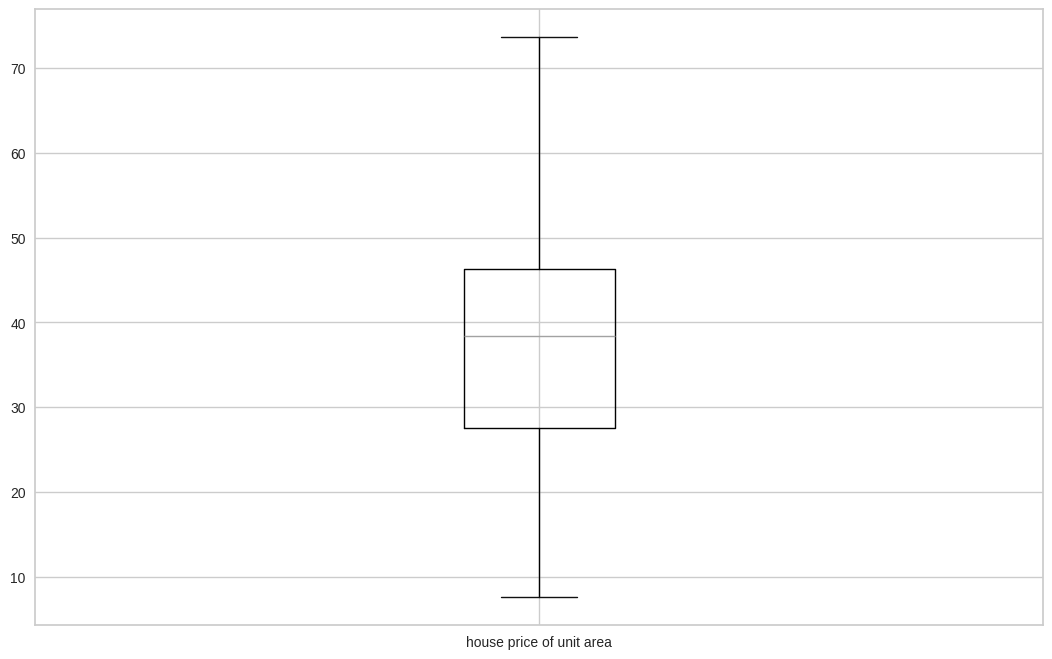

In [86]:
df[[Y_label]].boxplot(figsize=(13, 8))

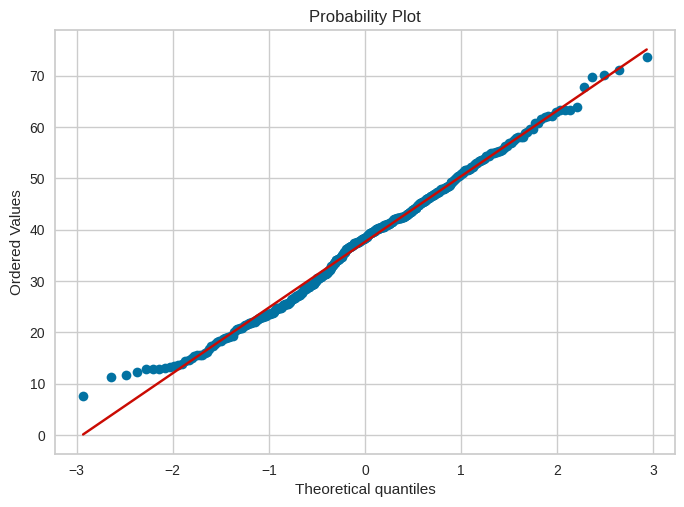

In [87]:
#QQ-Plot
stats.probplot(df[Y_label], dist='norm', plot=py)
py.show()

In [88]:
# Вычисление корреляции между столбцами фрейма данных
df.corr()

,number,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
number,1.000000,-0.053265,-0.036132,-0.011253,-0.015526,-0.011186,-0.012034,-0.046360
transaction date,-0.053265,1.000000,0.010083,0.065700,0.002447,0.032960,-0.043740,0.067013
house age,-0.036132,0.010083,1.000000,0.030167,0.035385,0.052285,-0.053527,-0.242852
distance to the nearest MRT station,-0.011253,0.065700,0.030167,1.000000,-0.604710,-0.590426,-0.806768,-0.701349
number of convenience stores,-0.015526,0.002447,0.035385,-0.604710,1.000000,0.446079,0.448211,0.605853
latitude,-0.011186,0.032960,0.052285,-0.590426,0.446079,1.000000,0.412657,0.571849
longitude,-0.012034,-0.043740,-0.053527,-0.806768,0.448211,0.412657,1.000000,0.554585
house price of unit area,-0.046360,0.067013,-0.242852,-0.701349,0.605853,0.571849,0.554585,1.000000


<Axes: >

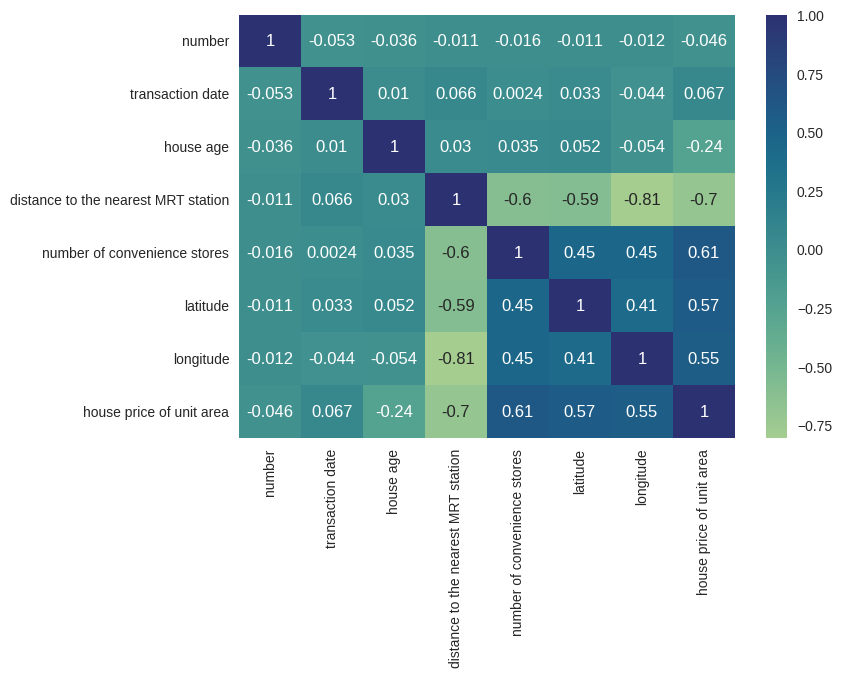

In [89]:
# Вывод тепловой карты корреляций между столбцами
sns.heatmap(df.corr(), annot=True, cmap='crest')

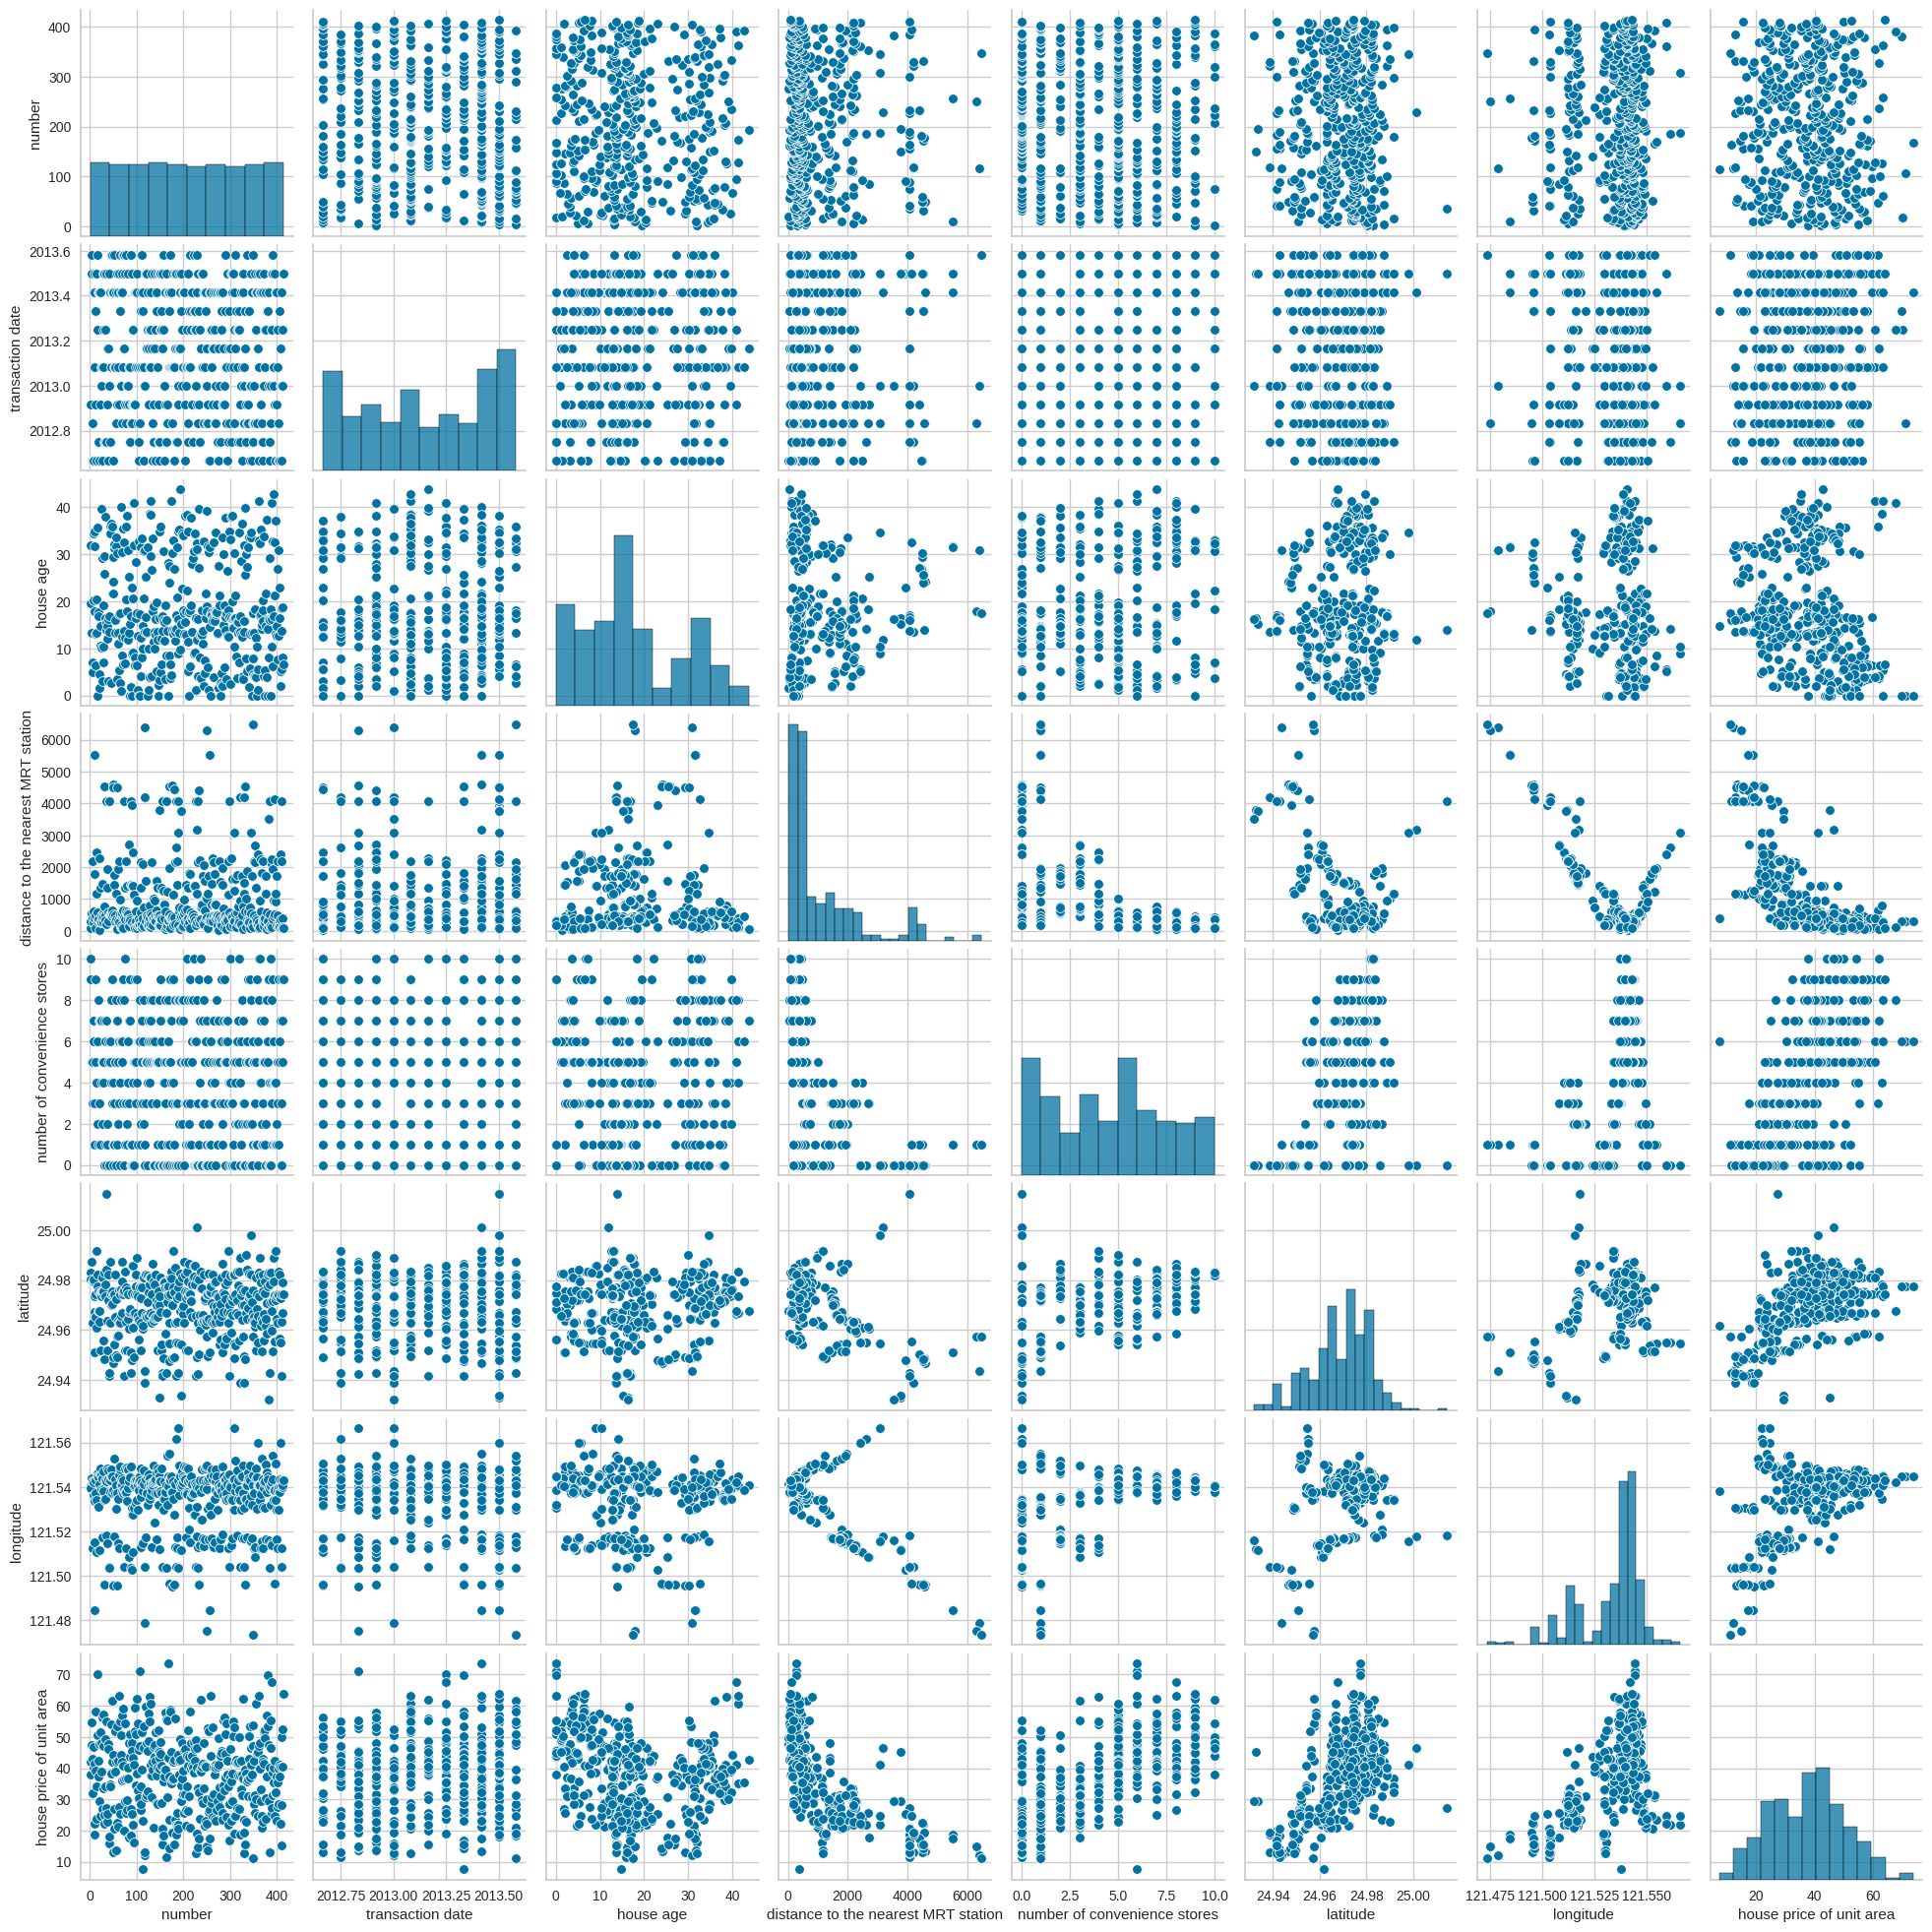

In [90]:
# Построение диаграмм рассеяния
sns.pairplot(df)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   number                               411 non-null    int64  
 1   transaction date                     411 non-null    float64
 2   house age                            411 non-null    float64
 3   distance to the nearest MRT station  411 non-null    float64
 4   number of convenience stores         411 non-null    int64  
 5   latitude                             411 non-null    float64
 6   longitude                            411 non-null    float64
 7   house price of unit area             411 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 28.9 KB


# Одномерная линейная регрессия

In [92]:
# Задача: определить, как цена на недвижимость зависит от расстояния до ближайшей станции метро

Y_label = "house price of unit area"
X_label = "distance to the nearest MRT station"

X = df[X_label]
y = df[Y_label]

In [93]:
X.shape

(411,)

In [94]:
y.shape

(411,)

In [95]:
X.info()

<class 'pandas.core.series.Series'>
Index: 411 entries, 0 to 413
Series name: distance to the nearest MRT station
Non-Null Count  Dtype  
--------------  -----  
411 non-null    float64
dtypes: float64(1)
memory usage: 6.4 KB


In [96]:
# Делим датасет на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=101
)

X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [97]:
X_train.shape

(287, 1)

In [98]:
y_train.shape

(287,)

In [99]:
# Создание модели линейной регрессии
linear = LinearRegression()

# Обучение модели
linear.fit(X_train, y_train)

LinearRegression()

In [100]:
# Точность предсказания модели
linear.score(X_test, y_test)

0.544817050487755

In [101]:
# Получение оценки R^2
r_sq = r2_score(y_test, linear.predict(X_test))
r_sq

0.544817050487755

In [102]:
# Получение параметров
linear.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [103]:
# b0 - модель предсказывает ответ 45.72180064120051 при x равном 0
linear.intercept_

45.72180064120051

In [104]:
# b1 - предсказанный ответ возрастает на -0.00726932 при x, увеличинным на 1
linear.coef_

array([-0.00726932])

In [105]:
linear.predict([[0]])

array([45.72180064])

In [106]:
linear.predict([[1]])

array([45.71453132])

In [107]:
linear.predict([[1]]) - linear.predict([[0]])

array([-0.00726932])

In [108]:
pd.DataFrame(linear.coef_, X.to_frame().columns, columns=['Coefficient'])

,Coefficient
distance to the nearest MRT station,-0.007269


In [109]:
# Предсказание цены на недвижимость по числу лет недвижимости
y_pred = linear.predict(X_test)

# Вывод 10-ти предсказанных цен
pd.DataFrame({'Test': y_test,'Pred':y_pred }).head(10)

,Test,Pred
0,36.5,42.289411
1,40.6,42.133248
2,39.1,44.576117
3,36.9,44.586011
4,35.3,42.495660
5,43.5,43.729901
6,30.5,42.868984
7,42.8,44.959902
8,51.0,43.618605
9,50.0,45.064246


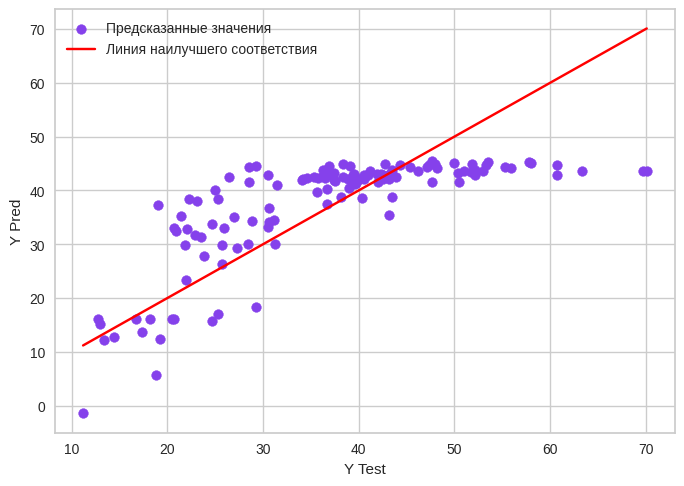

In [110]:
plt.scatter(y_test, y_pred, color='#8541EB', label='Предсказанные значения')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Линия наилучшего соответствия')

plt.xlabel('Y Test')
plt.ylabel('Y Pred')
plt.legend()

plt.show()

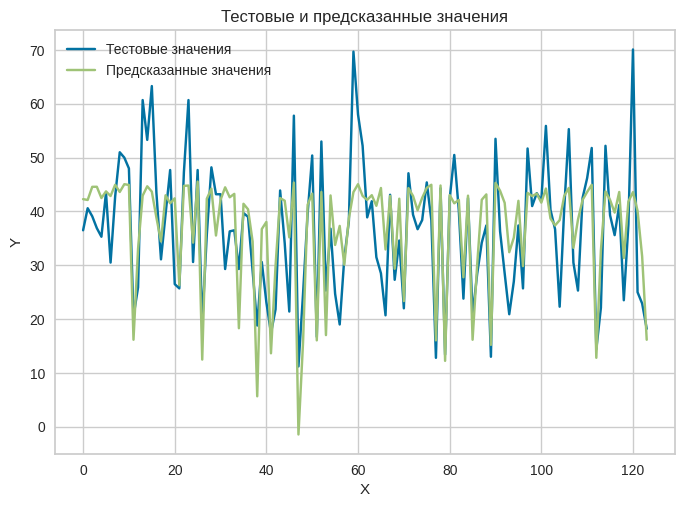

In [111]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Тестовые значения")
plt.plot(x_ax, y_pred, label="Предсказанные значения")
plt.title("Тестовые и предсказанные значения")

plt.xlabel('X')
plt.ylabel('Y')

plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [112]:
# Вычисляем регрессионные метрики
MAE  = metrics.mean_absolute_error(y_test, y_pred)
MSE  = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,6.542589
MSE,71.480191
RMSE,8.454596


In [113]:
# Средняя цена на недвижимость
df[Y_label].mean()

37.59124087591241

In [114]:
# Вычисляем разницу между тестовыми значениями и предсказанными
test_diff = (y_test - y_pred)

# Строим диаграмму ошибок
pd.DataFrame({'Error Values': (test_diff)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

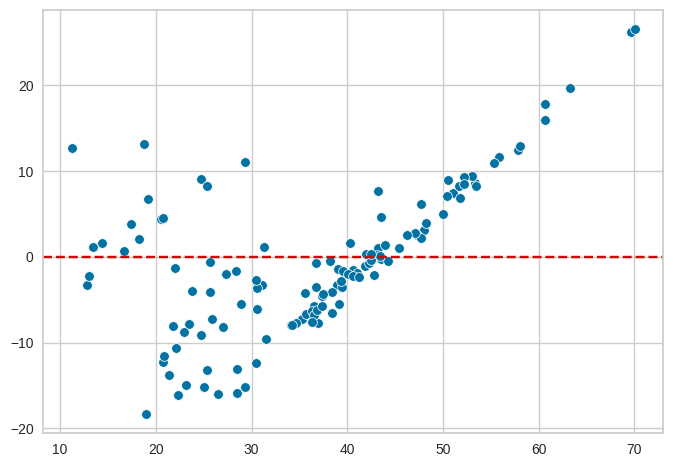

In [115]:
sns.scatterplot(x=y_test, y=test_diff)
plt.axhline(y=0, color='r', ls='--')

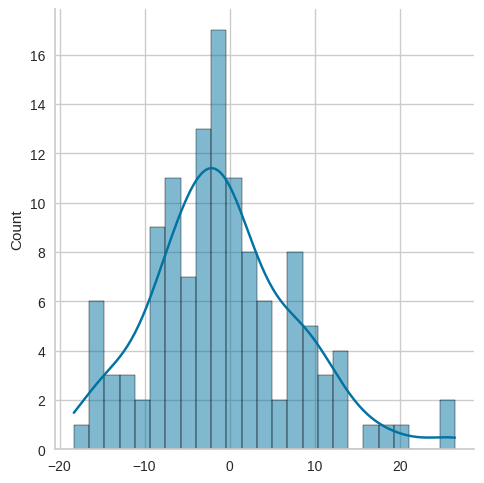

In [116]:
sns.displot(test_diff, bins=25, kde=True)

# Метод дерева решений

In [117]:
# Импортируем необходимую библиотеку для работы с деревом решений
from sklearn.tree import DecisionTreeRegressor

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   number                               411 non-null    int64  
 1   transaction date                     411 non-null    float64
 2   house age                            411 non-null    float64
 3   distance to the nearest MRT station  411 non-null    float64
 4   number of convenience stores         411 non-null    int64  
 5   latitude                             411 non-null    float64
 6   longitude                            411 non-null    float64
 7   house price of unit area             411 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 28.9 KB


In [119]:
# Задача: определить, как цена на недвижимость зависит от расстояния до ближайшей станции метро

# Подготовка набора данных
X_label_tree = "distance to the nearest MRT station"

X_tree = df[X_label_tree]
y_tree = df[Y_label]

# Делим датасет на обучающий и тестовый наборы
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree,
    y_tree,
    test_size=0.3,
    random_state=101
)

X_train_tree = X_train_tree.to_numpy().reshape(-1, 1)
X_test_tree = X_test_tree.to_numpy().reshape(-1, 1)

y_train_tree = y_train_tree.to_numpy()
y_test_tree = y_test_tree.to_numpy()

In [120]:
# Создание модели регрессора на основе дерева решений
decisionTree = DecisionTreeRegressor(random_state=1)

# Обучение модели на тренировочном наборе даных
decisionTree.fit(X_train_tree, y_train_tree)

DecisionTreeRegressor(random_state=1)

In [121]:
# Оценка точности предсказаний модели
decisionTree.score(X_test_tree, y_test_tree)

0.5996171921054466

In [122]:
# Предсказание цены на недвижимость по числу лет недвижимости
y_pred_tree = decisionTree.predict(X_test_tree)

# Вывод 10-ти предсказанных цен
pd.DataFrame({'Test': y_test_tree,'Pred':y_pred_tree }).head(10)

,Test,Pred
0,36.5,36.200000
1,40.6,41.180000
2,39.1,41.500000
3,36.9,41.500000
4,35.3,42.600000
5,43.5,45.400000
6,30.5,7.600000
7,42.8,52.680000
8,51.0,50.744444
9,50.0,58.144444


In [123]:
y_pred_tree = decisionTree.predict(X_test_tree)

# Вычисляем ошибку
MAE  = metrics.mean_absolute_error(y_test_tree, y_pred_tree)
MSE  = metrics.mean_squared_error(y_test_tree, y_pred_tree)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,5.555959
MSE,62.874586
RMSE,7.929350


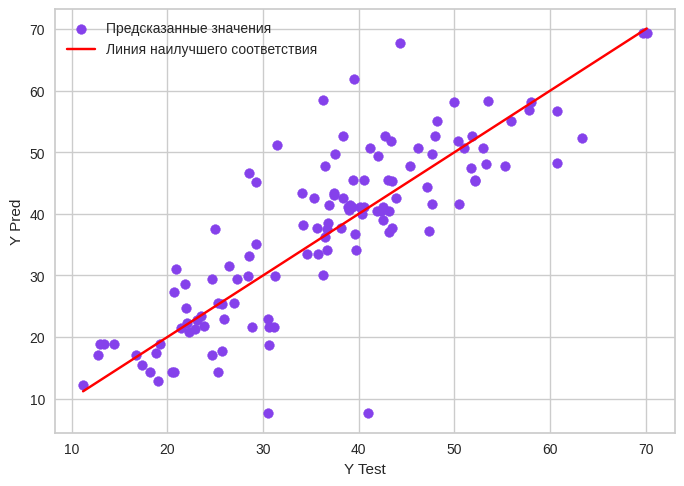

In [124]:
plt.scatter(y_test_tree, y_pred_tree, color='#8541EB', label='Предсказанные значения')

plt.plot([min(y_test_tree), max(y_test_tree)], [min(y_test_tree), max(y_test_tree)], color='red', label='Линия наилучшего соответствия')

plt.xlabel('Y Test')
plt.ylabel('Y Pred')
plt.legend()

plt.show()

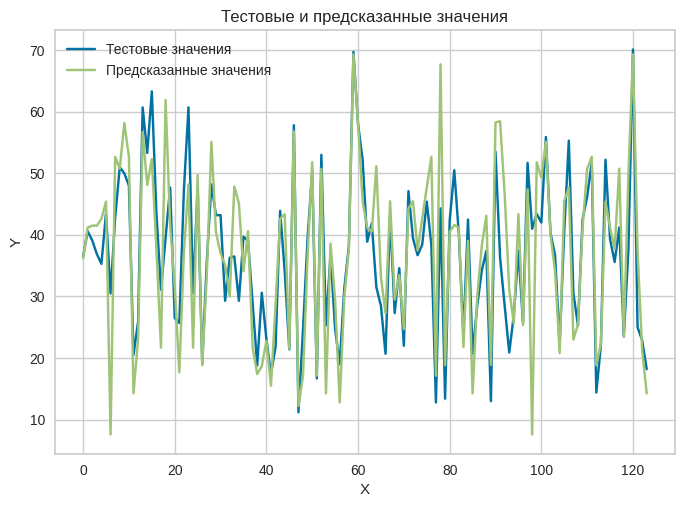

In [125]:
x_ax = range(len(y_test_tree))
plt.plot(x_ax, y_test_tree, label="Тестовые значения")
plt.plot(x_ax, y_pred_tree, label="Предсказанные значения")
plt.title("Тестовые и предсказанные значения")

plt.xlabel('X')
plt.ylabel('Y')

plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

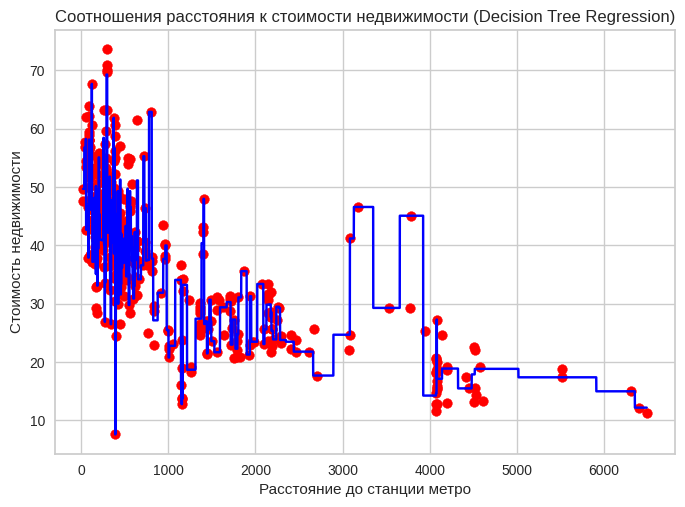

In [126]:
X_grid = np.arange(min(X_tree), max(X_tree), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'red')

plt.plot(X_grid, decisionTree.predict(X_grid), color = 'blue')

plt.title('Соотношения расстояния к стоимости недвижимости (Decision Tree Regression)')
plt.xlabel('Расстояние до станции метро')
plt.ylabel('Стоимость недвижимости')

plt.show()

In [127]:
# Импортируем graphviz
from sklearn.tree import export_graphviz

export_graphviz(decisionTree, out_file ='tree.dot',
               feature_names=['House prices'])

In [128]:
!dot -Tps /content/tree.dot -o /content/out_tree.ps

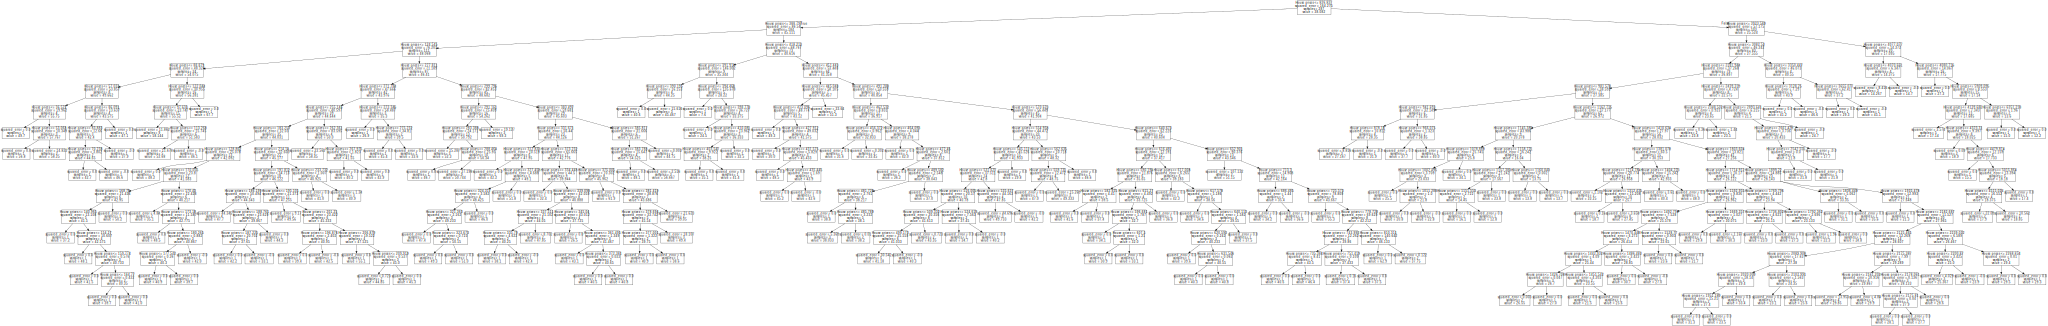

In [129]:
from graphviz import Source
from sklearn import tree

Source(tree.export_graphviz(decisionTree, out_file=None, feature_names=['House prices']))

In [130]:
from IPython.display import SVG
from graphviz import Source
from sklearn import tree

graph = Source(tree.export_graphviz(decisionTree, out_file=None, feature_names=['House prices']))
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'

# Метод k-ближайших соседей

In [55]:
# Задача: определить группы недвижимости по разности координат

# Получение информации о местоположении недвижимости
location = df.iloc[:, [5, 6]].values

In [131]:
location

array([[ 24.98298, 121.54024],
       [ 24.98034, 121.53951],
       [ 24.98746, 121.54391],
       [ 24.98746, 121.54391],
       [ 24.97937, 121.54245],
       [ 24.96305, 121.51254],
       [ 24.97933, 121.53642],
       [ 24.98042, 121.54228],
       [ 24.95095, 121.48458],
       [ 24.96731, 121.51486],
       [ 24.97349, 121.53372],
       [ 24.97433, 121.5431 ],
       [ 24.96515, 121.53737],
       [ 24.96108, 121.51046],
       [ 24.99156, 121.53406],
       [ 24.9824 , 121.54619],
       [ 24.97744, 121.54458],
       [ 24.97544, 121.53119],
       [ 24.9675 , 121.54451],
       [ 24.96772, 121.54102],
       [ 24.96314, 121.51151],
       [ 24.97528, 121.54541],
       [ 24.95204, 121.54842],
       [ 24.97528, 121.54541],
       [ 24.97353, 121.53885],
       [ 24.97542, 121.51726],
       [ 24.98085, 121.54391],
       [ 24.95593, 121.53913],
       [ 24.97419, 121.53797],
       [ 24.97563, 121.54694],
       [ 24.94826, 121.49587],
       [ 24.98281, 121.53408],
       [

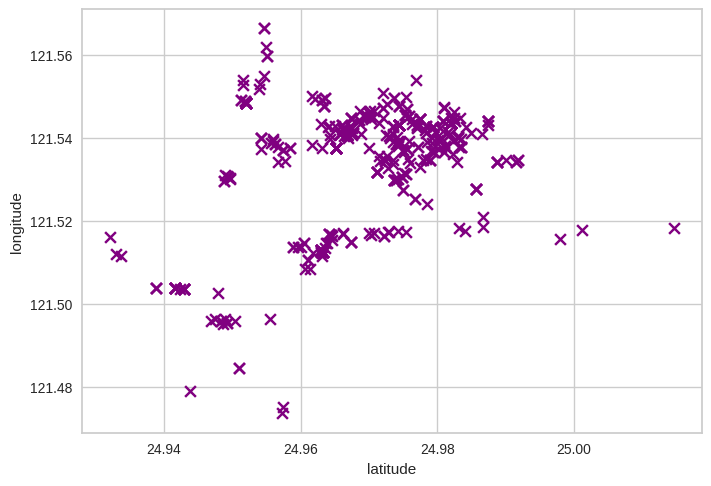

In [132]:
# Визуализация местоположения недвижимости
plt.scatter(location[:,0], location[:,1], marker = "x", color = 'purple', s = 60)

plt.xlabel('latitude')
plt.ylabel('longitude')

plt.show()

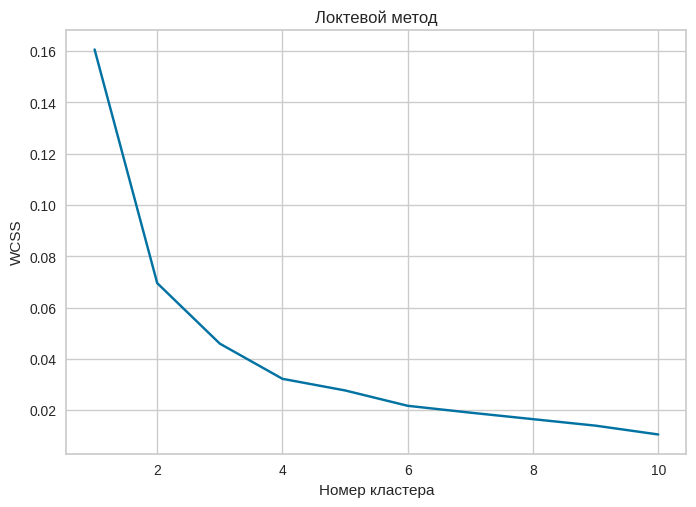

In [137]:
# Поиск оптимального числа кластеров с помощью локтевого метода
from sklearn.cluster import KMeans

wcss = []
target_range = range(1, 11)

for i in target_range:
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
  kmeans.fit(location)
  wcss.append(kmeans.inertia_)

plt.plot(target_range, wcss)
plt.title('Локтевой метод')

plt.xlabel('Номер кластера')
plt.ylabel('WCSS')

plt.savefig('number_of_clusters.png')
plt.show()

In [138]:
# Создадим модель для KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)

# Получение предсказаний того, к какому кластеру относится отдельная пара координат (lat; lng)
y_kmeans = kmeans.fit_predict(location)

y_kmeans

array([2, 2, 2, 2, 2, 3, 2, 2, 0, 3, 2, 2, 1, 3, 2, 2, 2, 2, 1, 1, 3, 2,
       1, 2, 2, 3, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 2, 2, 0, 0, 1, 2,
       2, 1, 1, 2, 0, 0, 2, 1, 3, 1, 2, 1, 2, 1, 0, 1, 3, 2, 3, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 3, 2, 1, 2, 1, 1, 3, 1, 1, 1, 0,
       2, 0, 2, 2, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 3,
       1, 2, 3, 1, 2, 2, 0, 0, 3, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3,
       2, 2, 1, 1, 2, 1, 2, 1, 2, 3, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 1, 1,
       0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 3, 0, 1, 3, 3, 1, 2, 0, 2, 2, 1, 2, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 1, 3, 0, 0, 2, 3, 1, 2, 2, 2, 1, 3, 1, 3,
       2, 3, 2, 1, 1, 1, 0, 2, 1, 2, 3, 2, 0, 2, 2, 2, 1, 3, 3, 2, 3, 1,
       2, 3, 2, 2, 1, 1, 1, 2, 2, 1, 1, 3, 1, 3, 1, 2, 1, 3, 1, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 2, 3, 2, 1, 0, 2, 1, 2, 3,

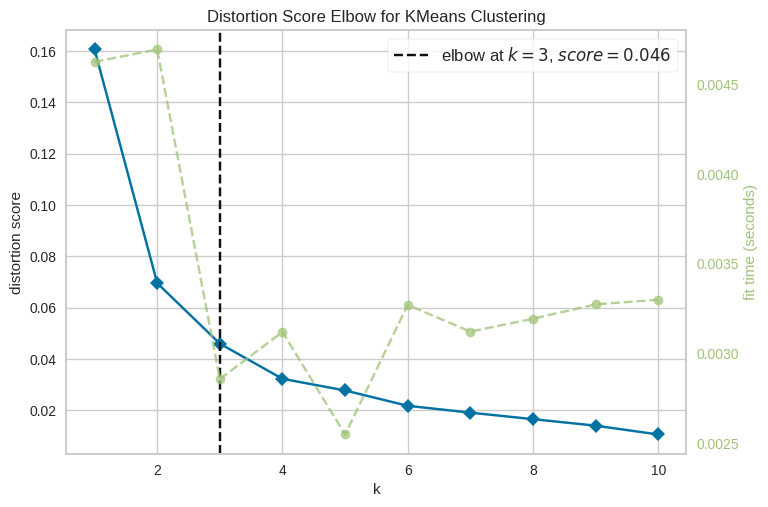

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [135]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k = (1, 11))
visualizer.fit(location)
visualizer.show()

<ipython-input-139-ea9402fbe6c6>:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(location[y_kmeans == i, 0], location[y_kmeans == i, 1], s= 60, c = colors(i), marker = "x")


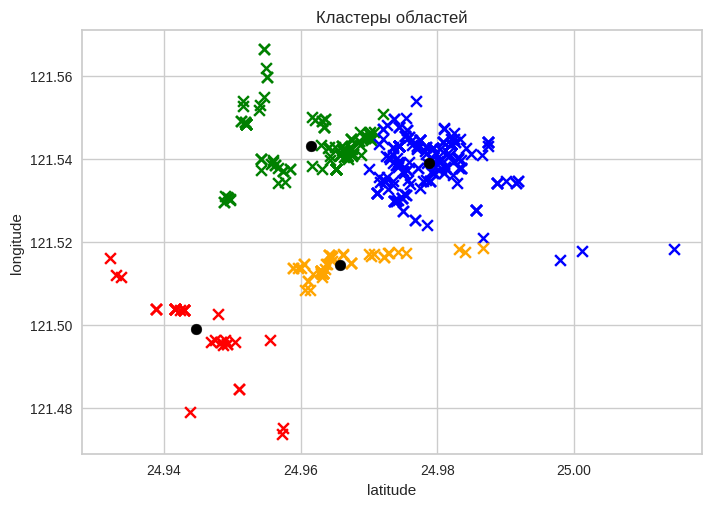

In [139]:
from matplotlib.colors import ListedColormap

raw_colors = ("red", "green", "blue", "orange")
colors = ListedColormap(raw_colors)

for i in range(5):
  plt.scatter(location[y_kmeans == i, 0], location[y_kmeans == i, 1], s= 60, c = colors(i), marker = "x")


X_clusters = kmeans.cluster_centers_[:, 0]
Y_clusters = kmeans.cluster_centers_[:, 1]

plt.scatter(X_clusters, Y_clusters, s= 60, c= "black")

plt.title('Кластеры областей')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

In [140]:
area = y_kmeans
df_new = df.copy()

df_new["unit area"] = area
df_new

location_map = df_new[['latitude','longitude','unit area']]

def getColorByArea(area):
  if area == 0:
    return "red"
  elif area == 1:
    return "green"
  elif area == 2:
    return "blue"
  else:
    return "orange"

location_map['color'] = location_map['unit area'].apply(getColorByArea)
location_map['size']  = location_map['unit area'].apply(lambda area: 6)

<ipython-input-140-962e52fbe098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_map['color'] = location_map['unit area'].apply(getColorByArea)
<ipython-input-140-962e52fbe098>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_map['size']  = location_map['unit area'].apply(lambda area: 6)


In [141]:
import folium

# Рисование карты
map = folium.Map(location_map = [24.968, 121.53], zoom_start = 13)

zip_res = zip(location_map['latitude'], location_map['longitude'], location_map['unit area'], location_map['color'], location_map['size'])

# Рисование маркеров, соответствующих элементам недвижимости распределённым по группам
for lat,lon,price,color,size in zip_res:
  folium.CircleMarker([lat, lon],
                      popup=price,
                      radius=size,
                      color='b',
                      fill=True,
                      fill_opacity=0.7,
                      fill_color=color,
  ).add_to(map)

map

# Метод опорных векторов (SVR)

In [142]:
# Подключение необходимых библиотек
from sklearn.svm import SVR

In [143]:
# Задача: определить, как цена на недвижимость зависит от расстояния до ближайшей станции метро

# Подготовка набора данных
X_label_svr = "distance to the nearest MRT station"

X_svr = df[X_label_svr]
y_svr = df[Y_label]

# Делим датасет на обучающий и тестовый наборы
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(
    X_svr,
    y_svr,
    test_size=0.3,
    random_state=101
)

X_train_svr = X_train_svr.to_numpy().reshape(-1, 1)
X_test_svr = X_test_svr.to_numpy().reshape(-1, 1)

y_train_svr = y_train_svr.to_numpy()
y_test_svr = y_test_svr.to_numpy()

In [144]:
modelSVR = SVR()
modelSVR.fit(X_train_svr, y_train_svr)

SVR()

In [145]:
# Оценка точности предсказаний модели
modelSVR.score(X_test_svr, y_test_svr)

0.6298849415461867

In [146]:
# Предсказание цены на недвижимость по числу лет недвижимости
y_pred_svr = modelSVR.predict(X_test_svr)

# Вывод 10-ти предсказанных цен
pd.DataFrame({'Test': y_test_svr,'Pred':y_pred_svr }).head(10)

,Test,Pred
0,36.5,42.252569
1,40.6,41.930997
2,39.1,45.760129
3,36.9,45.769492
4,35.3,42.664317
5,43.5,44.759506
6,30.5,43.368509
7,42.8,46.082232
8,51.0,44.599685
9,50.0,46.155075


In [150]:
y_pred_svr = modelSVR.predict(X_test_svr)

# Вычисляем ошибку
MAE  = metrics.mean_absolute_error(y_test_svr, y_pred_svr)
MSE  = metrics.mean_squared_error(y_test_svr, y_pred_svr)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,5.762679
MSE,58.121454
RMSE,7.623743


In [149]:
y_test_svr[5]

43.5

In [151]:
modelSVR.predict([X_test_svr[5]])

array([44.75950607])

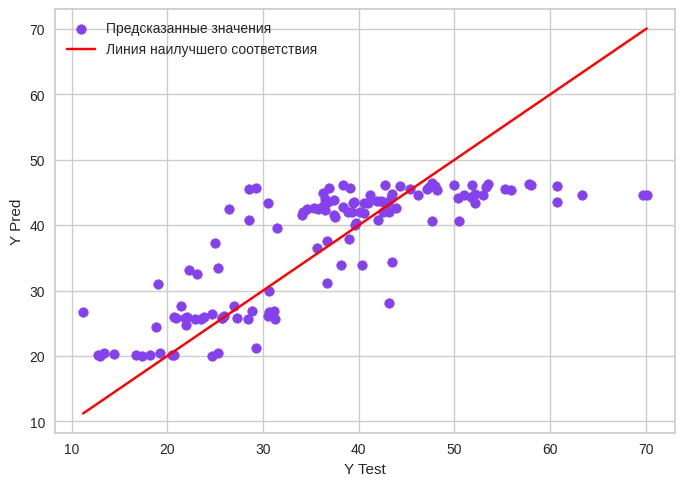

In [152]:
plt.scatter(y_test_svr, y_pred_svr, color='#8541EB', label='Предсказанные значения')

plt.plot([min(y_test_svr), max(y_test_svr)], [min(y_test_svr), max(y_test_svr)], color='red', label='Линия наилучшего соответствия')

plt.xlabel('Y Test')
plt.ylabel('Y Pred')
plt.legend()

plt.show()

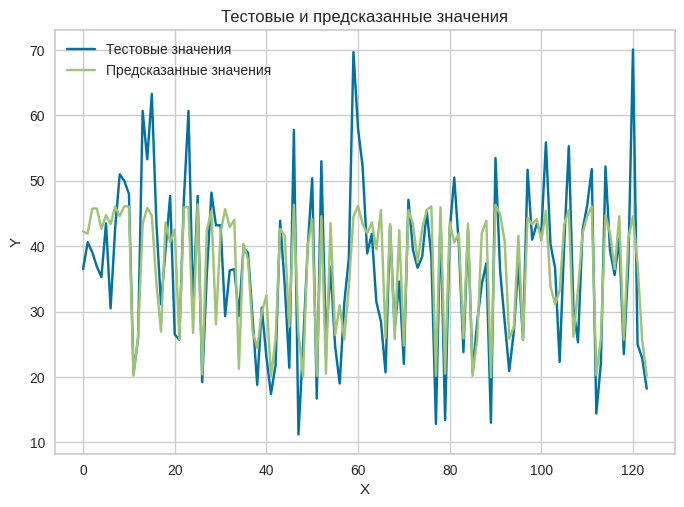

In [153]:
x_ax_svr = range(len(y_test_svr))
plt.plot(x_ax_svr, y_test_svr, label="Тестовые значения")
plt.plot(x_ax_svr, y_pred_svr, label="Предсказанные значения")
plt.title("Тестовые и предсказанные значения")

plt.xlabel('X')
plt.ylabel('Y')

plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()